In [1]:
import csv
import skimage
from skimage import data
from numpy import array
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
import os

from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
import timeit

In [5]:
csv.register_dialect('myDialect',
delimiter = ',',
skipinitialspace=True)
testImages_5=[]
testLabels_5=[]
testImages_6=[]
testLabels_6=[]
testImages_7=[]
testLabels_7=[]

with open('trainVal.csv','r') as csvFile:
    reader = csv.reader(csvFile,dialect='myDialect')
    for row in reader:
#         if row[3]=='1':
#             img=skimage.data.imread(row[1])
#             img = skimage.transform.resize(img,(40,200,3))
            
            
#             #### face different length of license
#             x_trainLabel=str(row[2])
#             if len(x_trainLabel)==7:
#                 trainImages.append(img)
#                 trainLabels.append(x_trainLabel[0:3]+'#'+x_trainLabel[3:])
#             if len(x_trainLabel)==6:
#                 trainImages.append(img)
#                 trainLabels.append(x_trainLabel[0:3]+'..'+x_trainLabel[3:])
#             if len(x_trainLabel)==5:
#                 trainImages.append(img)
#                 trainLabels.append(x_trainLabel[0]+'###'+x_trainLabel[1:])
                
        if row[3]=='0':
            img=skimage.data.imread(row[1])
            img = skimage.transform.resize(img,(40,200,3))
            
            
            x_testLabel=str(row[2])
            if len(x_testLabel)==7:
                testImages_7.append(img)
                testLabels_7.append(x_testLabel[0:3]+'#'+x_testLabel[3:])
            if len(x_testLabel)==6:
                testImages_6.append(img)
                testLabels_6.append(x_testLabel[0:3]+'..'+x_testLabel[3:])
            if len(x_testLabel)==5:
                testImages_5.append(img)
                testLabels_5.append(x_testLabel[0]+'###'+x_testLabel[1:])
        
        #print(row,row[3])

In [7]:
# define universe of possible input values
alphabet = '0123456789abcdefghijklmnopqrstuvwxyz#. '.upper()
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

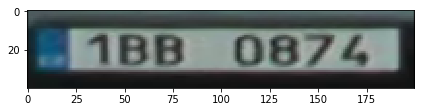

In [20]:
skimage.io.imshow(img)

In [29]:
Image=skimage.transform.resize(img,(10,50,3))
Image = skimage.transform.resize(Image,(40,200,3))

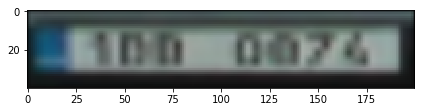

In [30]:
skimage.io.imshow(Image)

In [8]:
list_testLabels_5=list()
list_testLabels_6=list()
list_testLabels_7=list()
for testlabel in testLabels_5:
    test_encoded = [char_to_int[char] for char in testlabel]
    for value in test_encoded:
        letter = [0 for _ in range(len(alphabet))]
        letter[value] = 1
        list_testLabels_5.append(letter)
for testlabel in testLabels_6:
    test_encoded = [char_to_int[char] for char in testlabel]
    for value in test_encoded:
        letter = [0 for _ in range(len(alphabet))]
        letter[value] = 1
        list_testLabels_6.append(letter)
for testlabel in testLabels_7:
    test_encoded = [char_to_int[char] for char in testlabel]
    for value in test_encoded:
        letter = [0 for _ in range(len(alphabet))]
        letter[value] = 1
        list_testLabels_7.append(letter)

In [9]:
len(list_testLabels_5),len(list_testLabels_6),len(list_testLabels_7)

(0, 1008, 608256)

In [10]:
testY_5=np.array(list_testLabels_5)
testX_5=np.array(testImages_5)
testY_6=np.array(list_testLabels_6)
testX_6=np.array(testImages_6)
testY_7=np.array(list_testLabels_7)
testX_7=np.array(testImages_7)

In [12]:
# testY_5=testY_5.reshape(len(testLabels_5),8,39)
# testX_5=testX_5.reshape(len(testImages_5),testImages_5[0].shape[0],
#                            testImages_5[0].shape[1],
#                            testImages_5[0].shape[2]).astype("float32")/255
testY_6=testY_6.reshape(len(testLabels_6),8,39)
testX_6=testX_6.reshape(len(testImages_6),testImages_6[0].shape[0],
                           testImages_6[0].shape[1],
                           testImages_6[0].shape[2]).astype("float32")/255
testY_7=testY_7.reshape(len(testLabels_7),8,39)
testX_7=testX_7.reshape(len(testImages_7),testImages_7[0].shape[0],
                           testImages_7[0].shape[1],
                           testImages_7[0].shape[2]).astype("float32")/255

In [13]:
del testImages_7
del testImages_6
del list_testLabels_6
del list_testLabels_7


In [14]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'resNet_LP_cz_paper_epoch200.h5'
model_path = os.path.join(save_dir, model_name)
k_model = load_model(model_path)

In [15]:
###character length 6
license=0
total_license=0
character =0 
total_character=0
for n in range(0,len(testX_6)):
    p=k_model.predict_on_batch(testX_6[n:n+1])
    truth = testY_6[n]
    
    for x in range(0,8):
        total_character+=1
        if int_to_char[argmax(truth[x])]==int_to_char[argmax(p[x])]:
            character+=1
    total_license+=1
    if (int_to_char[argmax(truth[0])]==int_to_char[argmax(p[0])] and
        int_to_char[argmax(truth[1])]==int_to_char[argmax(p[1])] and
        int_to_char[argmax(truth[2])]==int_to_char[argmax(p[2])] and 
        int_to_char[argmax(truth[3])]==int_to_char[argmax(p[3])] and
        int_to_char[argmax(truth[4])]==int_to_char[argmax(p[4])] and
        int_to_char[argmax(truth[5])]==int_to_char[argmax(p[5])] and
        int_to_char[argmax(truth[6])]==int_to_char[argmax(p[6])] and
        int_to_char[argmax(truth[7])]==int_to_char[argmax(p[7])]):
        license+=1
LP_acc1=license/total_license  
character_acc1=character/total_character
print("license acc",LP_acc1) 
print("character",character_acc1)

license acc 0.35714285714285715
character 0.6716269841269841


'8'

In [16]:
###character length 7
license=0
total_license=0
character =0 
total_character=0
for n in range(0,len(testX_7)):
    p=k_model.predict_on_batch(testX_7[n:n+1])
    truth = testY_7[n]
    
    for x in range(0,8):
        total_character+=1
        if int_to_char[argmax(truth[x])]==int_to_char[argmax(p[x])]:
            character+=1
    total_license+=1
    if (int_to_char[argmax(truth[0])]==int_to_char[argmax(p[0])] and
        int_to_char[argmax(truth[1])]==int_to_char[argmax(p[1])] and
        int_to_char[argmax(truth[2])]==int_to_char[argmax(p[2])] and 
        int_to_char[argmax(truth[3])]==int_to_char[argmax(p[3])] and
        int_to_char[argmax(truth[4])]==int_to_char[argmax(p[4])] and
        int_to_char[argmax(truth[5])]==int_to_char[argmax(p[5])] and
        int_to_char[argmax(truth[6])]==int_to_char[argmax(p[6])] and
        int_to_char[argmax(truth[7])]==int_to_char[argmax(p[7])]):
        license+=1
LP_acc1=license/total_license  
character_acc1=character/total_character
print("license acc",LP_acc1) 
print("character",character_acc1)

license acc 0.9500210437710438
character 0.9891854745370371
